<a href="https://colab.research.google.com/github/dipakchhajed/Covide-19-ImpactAnalysis-on-IT-jobs/blob/main/Covide_19_ImpactAnalysis_on_IT_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total number of Company  - 8005

Dataframe Columns - Company Name , Status(Hiring,Hiring Freez,Layoff),Notes,City,Country,Company URL,public,job listing

In [ ]:
#import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Upload and read the HiringFreezes.pdf 
from google.colab import files
uploaded = files.upload()

Saving HiringFreezes1.xlsx to HiringFreezes1.xlsx


In [ ]:
import io
HiringFreezes_df  = pd.read_excel(io.BytesIO(uploaded['HiringFreezes1.xlsx']))

In [ ]:
#Describe HiringFreezes Data
HiringFreezes_df.describe

<bound method NDFrame.describe of         SrNo       Company_name  ...                URL  Job_listing
0        3.0    & Other Stories  ...                NaN          NaN
1        4.0  1A- Product Vent…  ...                NaN          NaN
2        5.0            1Huddle  ...  https://1huddle.…          NaN
3        6.0          1Password  ...  https://1passwor…          NaN
4        7.0            1stdibs  ...                NaN          NaN
...      ...                ...  ...                ...          ...
7999  8002.0      Zynex Medical  ...                NaN          NaN
8000  8003.0              Zynga  ...                NaN         0.02
8001  8004.0           Zypmedia  ...                NaN          NaN
8002  8005.0          三螺旋⼤数据有限…  ...                NaN          NaN
8003     NaN                NaN  ...                NaN  SUM  -25858

[8004 rows x 8 columns]>

In [ ]:
#Columns of the HiringFreezes data
HiringFreezes_df.columns

Index(['SrNo', 'Company_name', 'Status', 'Notes', 'City', 'Country', 'URL',
       'Job_listing'],
      dtype='object')

In [ ]:
#print head 10 of HiringFreezes
print(HiringFreezes_df.head(10)) 

   SrNo       Company_name  ...                URL Job_listing
0   3.0    & Other Stories  ...                NaN         NaN
1   4.0  1A- Product Vent…  ...                NaN         NaN
2   5.0            1Huddle  ...  https://1huddle.…         NaN
3   6.0          1Password  ...  https://1passwor…         NaN
4   7.0            1stdibs  ...                NaN         NaN
5   8.0   1T9 tech pvt ltd  ...                NaN         NaN
6   9.0            1winbet  ...                NaN         NaN
7  10.0                 2K  ...                NaN         NaN
8  11.0                 2U  ...                NaN       -0.39
9  12.0  3 Birds Marketing  ...                NaN         NaN

[10 rows x 8 columns]


In [ ]:
#Data Wragling Remove the junck data
HiringFreezes_df['Company_name'] = HiringFreezes_df['Company_name'].replace('三螺旋⼤数据有限…','NaN')

In [ ]:
HiringFreezes_df = HiringFreezes_df.fillna(value='NA',axis=1)

In [ ]:
ColumnName = ['Company_name', 'Status', 'Notes', 'City', 'Country', 'URL',
       'Job_listing']

In [ ]:
#Extract  Companies those who are Hiring
Hiring_df = HiringFreezes_df[HiringFreezes_df['Status']=='Hiring']
column = ['Company_name','Status']
print(Hiring_df[column])

           Company_name  Status
0       & Other Stories  Hiring
1     1A- Product Vent…  Hiring
2               1Huddle  Hiring
6               1winbet  Hiring
7                    2K  Hiring
...                 ...     ...
7994              Zuora  Hiring
7996              Zycus  Hiring
7999      Zynex Medical  Hiring
8000              Zynga  Hiring
8002                NaN  Hiring

[4052 rows x 2 columns]


In [ ]:
#Extract  Companies those who are Layoffs
Layoff_df = HiringFreezes_df[HiringFreezes_df['Status']=='Layoffs']
column = ['Company_name','Status']
print(Layoff_df[column])

           Company_name   Status
9     3 Birds Marketing  Layoffs
23              7Shifts  Layoffs
31      24 Hour Fitness  Layoffs
32      24 Seven Talent  Layoffs
51             A2zroomz  Layoffs
...                 ...      ...
7953               Zeus  Layoffs
7969              Zippo  Layoffs
7985               Zoox  Layoffs
7992           Zume Inc  Layoffs
7998           Zymergen  Layoffs

[539 rows x 2 columns]


In [ ]:
#Extract  Companies those who are Hiring freeze
Freezes_df = HiringFreezes_df[(HiringFreezes_df['Status']=='Hiring freeze')]
column = ['Company_name','Status']
print(Freezes_df[column])

          Company_name         Status
3            1Password  Hiring freeze
5     1T9 tech pvt ltd  Hiring freeze
22              7Geese  Hiring freeze
27              15Five  Hiring freeze
30             23andMe  Hiring freeze
...                ...            ...
7983            Zoover  Hiring freeze
7984             Zoovu  Hiring freeze
7987   Zoro (Grainger)  Hiring freeze
7997              Zylo  Hiring freeze
8001          Zypmedia  Hiring freeze

[2233 rows x 2 columns]


In [ ]:
#Extract  Companies those who are Hiring Frees and Hiring
FreezesHiring_df = HiringFreezes_df[HiringFreezes_df['Status']=='Hiring freeze      Hiring']
column = ['Company_name','Status']
print(FreezesHiring_df[column])

          Company_name                     Status
8                   2U  Hiring freeze      Hiring
41                360i  Hiring freeze      Hiring
54                 AAA  Hiring freeze      Hiring
63                 ABB  Hiring freeze      Hiring
67                 ABC  Hiring freeze      Hiring
...                ...                        ...
7883            Yandex  Hiring freeze      Hiring
7903            Yodlee  Hiring freeze      Hiring
7917       Yum! Brands  Hiring freeze      Hiring
7930              Zego  Hiring freeze      Hiring
7995  Zurich Insurance  Hiring freeze      Hiring

[389 rows x 2 columns]


**Data Exploration**

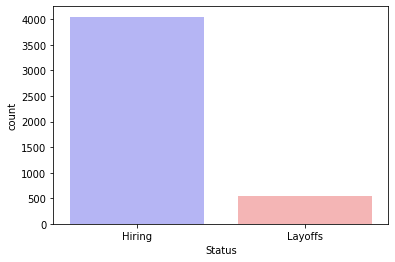

In [ ]:
#Hiring and Layoffs company count
sns.countplot(x="Status", data=Hiring_df.append(Layoff_df)  , palette="bwr")
plt.show()

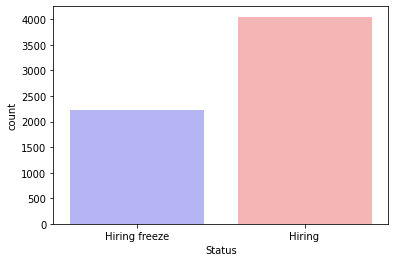

In [ ]:
#Hiring Freezes and Hiring Companies
sns.countplot(x="Status", data=Freezes_df.append(Hiring_df)  , palette="bwr")
plt.show()


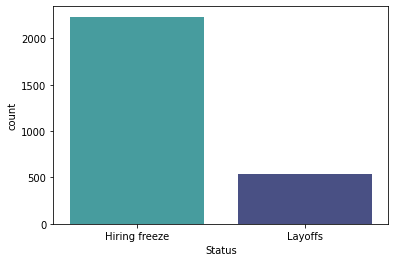

In [ ]:
#Hiring Freezes and Layoffes Companies
sns.countplot(x="Status", data=Freezes_df.append(Layoff_df)  , palette="mako_r")
plt.show()

In [ ]:
#Update Categorical Feature column
HiringFreezes_df['Status_cat'] = HiringFreezes_df['Status'].replace('Hiring', 1).replace('Layoffs', 2).replace('Hiring freeze', 3).replace('Hiring freeze      Hiring', 4).replace('Hiring freeze      Layoffs', 5)

In [ ]:
print(HiringFreezes_df)

      SrNo       Company_name  ...  Job_listing Status_cat
0        3    & Other Stories  ...           NA          1
1        4  1A- Product Vent…  ...           NA          1
2        5            1Huddle  ...           NA          1
3        6          1Password  ...           NA          3
4        7            1stdibs  ...           NA          5
...    ...                ...  ...          ...        ...
7999  8002      Zynex Medical  ...           NA          1
8000  8003              Zynga  ...         0.02          1
8001  8004           Zypmedia  ...           NA          3
8002  8005                NaN  ...           NA          1
8003    NA                 NA  ...  SUM  -25858         NA

[8004 rows x 9 columns]


In [ ]:
#Append Hiring and Layoff Companies
Hirinf_Layoff_df = Hiring_df.append(Layoff_df)

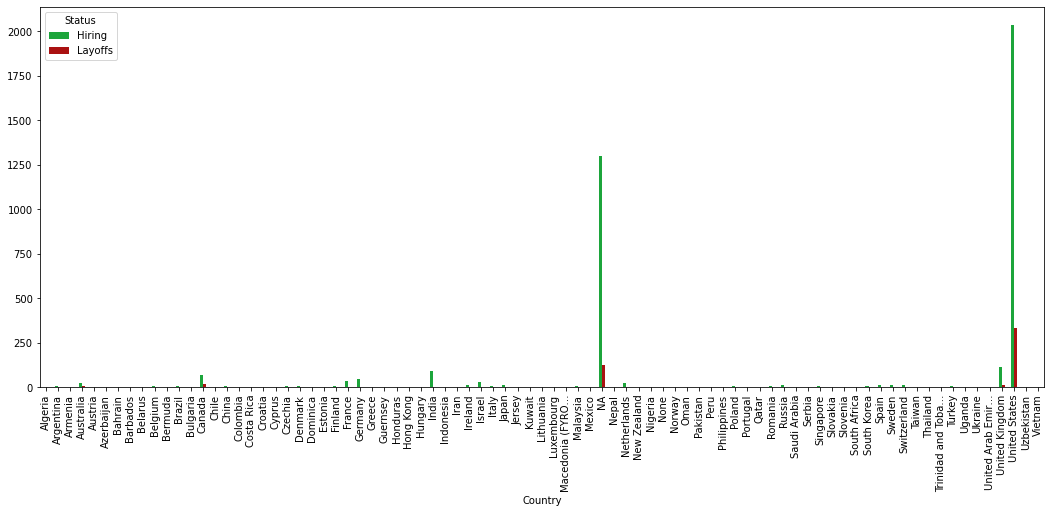

In [ ]:
#Contry Wise Hiring and Layoffs
pd.crosstab(Hirinf_Layoff_df.Country,Hirinf_Layoff_df.Status).plot(kind="bar",figsize=(18,7),color=['#1CA53B','#AA1111' ])
plt.show()

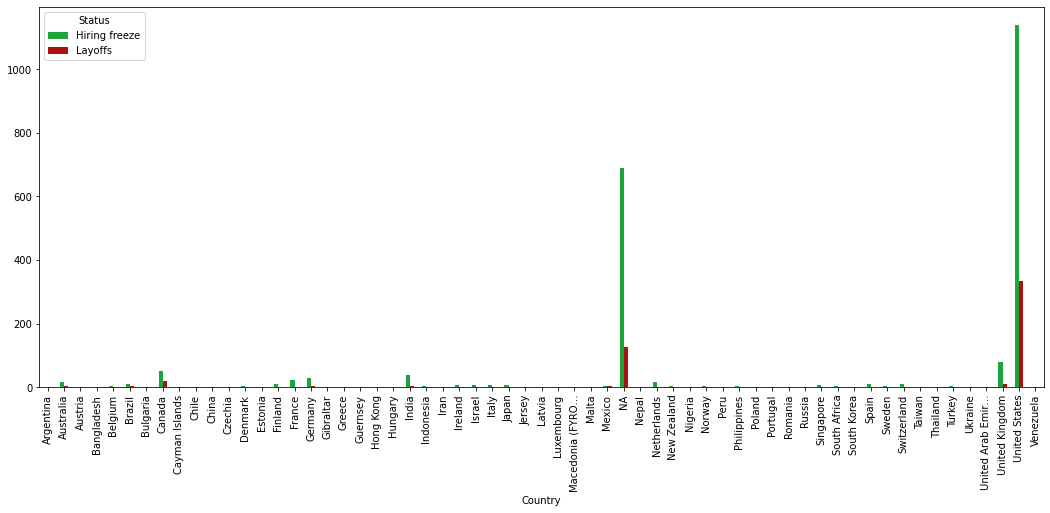

In [ ]:
#Contry Wise Freezes and Layoffs
FreezesLayoff_df =  Layoff_df.append(Freezes_df)
pd.crosstab(FreezesLayoff_df.Country,FreezesLayoff_df.Status).plot(kind="bar",figsize=(18,7),color=['#1CA53B','#AA1111' ])
plt.show()

**NLP on Notes Column**

**Step #1: Loading and Cleaning the Data**

In [ ]:
#Data Cleaning
#Remove the NaN Values from HiringFreezes_df data frame
HiringFreezes_df = HiringFreezes_df[HiringFreezes_df['Notes'].notna()]
print(HiringFreezes_df['Notes'])

1        Product, dev, design, agile coach, user research
2            Actively hiring for Enterprise AE & AE roles
3       (4/15) candidate in process was notified there...
4       Reports of a hiring freeze and claims of layof...
5                                    Not hiring currently
                              ...                        
7949           +1 report of a hiring freeze with no note.
7951    Report of hiring and claims of layoffs. Detail...
7952                1 report of hiring in all departments
7953                Hiring actively for all global roles.
7954                  Conflicting reports. Details below:
Name: Notes, Length: 4715, dtype: object


In [ ]:
#Extract the text from Notes column 
#Toknize the text
text = list(HiringFreezes_df.Notes)
tokens = [t.lower().replace(',','').replace('.','').replace(':','').replace("'",'') for t in str(text).split()]
print(tokens)
print('Count of Tokens - ' + str ( len(tokens))) 

['[product', 'dev', 'design', 'agile', 'coach', 'user', 'research', 'actively', 'hiring', 'for', 'enterprise', 'ae', '&', 'ae', 'roles', '(4/15)', 'candidate', 'in', 'process', 'was', 'notified', 'there', 'is', 'a', 'hiring', 'freeze', 'reports', 'of', 'a', 'hiring', 'freeze', 'and', 'claims', 'of', 'layoffs', 'details', 'below', 'not', 'hiring', 'currently', 'hackingservice', 'hiring', 'for', 'both', 'publishing', 'and', 'studios', 'https//2kcom/en-us/jobs/', 'conflicting', 'reports', 'of', 'a', 'hiring', 'freeze', 'and', 'continued', 'hiring', 'currently', 'in', 'may', 'de…', '+6', 'unconfirmed', 'claims', 'of', 'layoffs', 'with', 'no', 'note', 'as', 'of', '5/6', 'multiple', 'reports', 'of', 'continued', 'hiring', 'and', 'a', 'hiring', 'freeze', 'see', 'below', 'hiring', 'for', 'business', 'development', 'representatives', 'account', 'executives', 'and', 'a…', 'reports', 'of', 'a', 'hiring', 'freeze', 'details', 'below', 'business', 'development', '+3', 'reports', 'of', 'hiring', '+1

In [ ]:
#Import NLTK 
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stop

**Step #2: Forming the Lists of Keywords**

In [ ]:
#Remove the stop words from tokens
import nltk
nltk.download('stopwords')
sr = stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key, val in freq.items():
    print(str(key) + ':' + str(val))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[product:1
dev:16
design:55
agile:3
coach:3
user:5
research:17
actively:117
hiring:2970
enterprise:6
ae:3
&:66
roles:440
(4/15):4
candidate:7
process:23
notified:6
freeze:1257
reports:1152
claims:385
layoffs:764
details:595
currently:39
hackingservice:1
publishing:1
studios:1
https//2kcom/en-us/jobs/:1
conflicting:103
continued:113
may:32
de…:5
+6:5
unconfirmed:287
note:389
5/6:1
multiple:324
see:395
business:54
development:43
representatives:4
account:29
executives:11
a…:6
+3:24
+1:444
report:599
extensively:1
india:7
1:146
across:195
company:173
noting:105
"engineering":1
(4/22):6
organisation:4
full-stop:1
now;:1
summer:23
2020:21
internship:60
program:30
cancelled:35
critical:30
staff:52
site:13
(include:1
executive:11
…:93
new:79
looking:31
lead:19
react:5
native:2
engineer!:1
4:18
freezes:28
non-technical:1
website:18
opened:5
3:46
layoff:28
sales:179
outbound:1
(4/6):6


REPLACE hiring freeze by freeze 

**Count word Frequency**

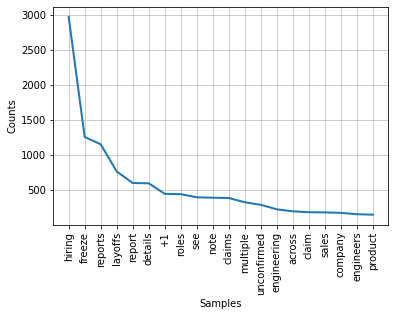

In [ ]:
freq.plot(20, cumulative=False)

Great!!! the code has correctly identified that Hiring is more than freeze and layoff :)

In [ ]:
print(tokens.count('engineers')) 
print(tokens.count('development')) 
print(tokens.count('software')) 
print(tokens.count('developers')) 
print(tokens.count('marketing')) 
print(tokens.count('engineering')) 

153
43
132
68
117
223
